In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
loan_data = pd.read_csv(r"C:\Users\asus 1\Desktop\Fliprobo\Machine learning projects\loan_prediction.csv")
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
loan_data.shape

(614, 13)

In [4]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
loan_data = loan_data.dropna()

In [6]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [8]:
loan_data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [9]:
loan_data= loan_data.replace(to_replace='3+', value=4)

In [10]:
loan_data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}, 'Loan_Status':{'N':0, 'Y':1}},inplace=True)
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


# Data Visualisation 

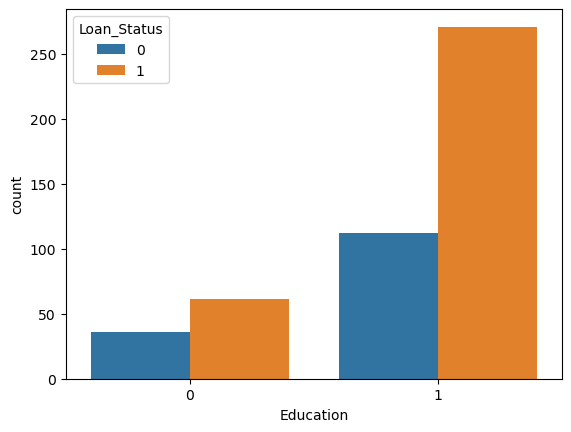

In [11]:
sns.countplot(x='Education', hue='Loan_Status', data=loan_data)
plt.show()

In [12]:
#loan is approved if the person is graduated 

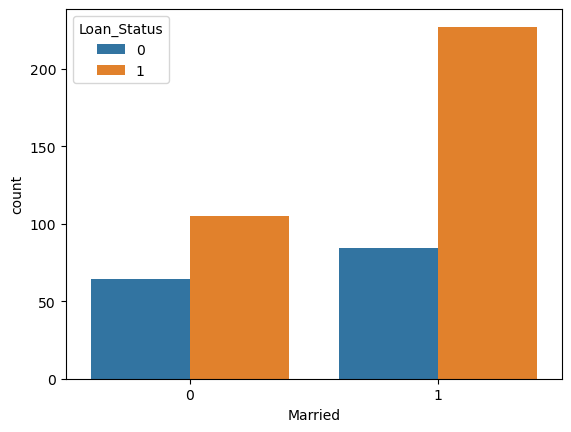

In [13]:
sns.countplot(x='Married', hue='Loan_Status', data=loan_data)
plt.show()

In [14]:
#loan is approved if the person is married

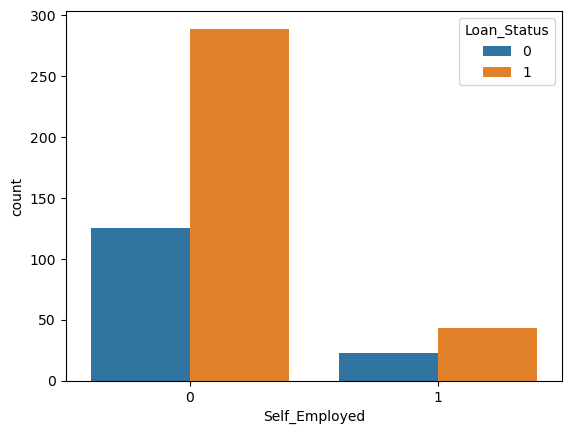

In [15]:
sns.countplot(x='Self_Employed', hue='Loan_Status', data=loan_data)
plt.show()

In [16]:
#Chances of approval are more for salaried person rather than self employed

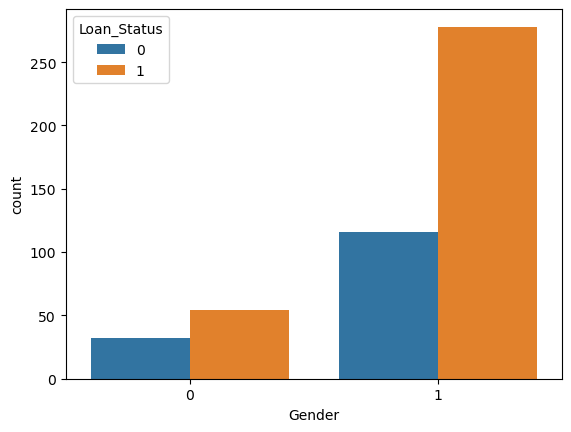

In [17]:
sns.countplot(x='Gender', hue='Loan_Status', data=loan_data)
plt.show()

<AxesSubplot:>

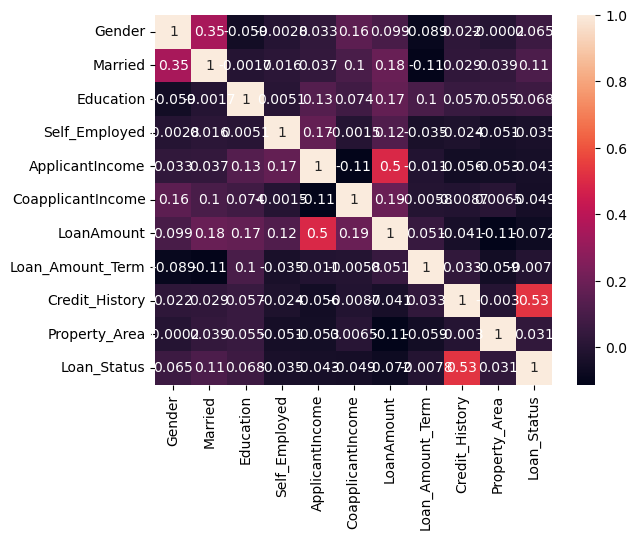

In [18]:
sns.heatmap(loan_data.corr(), annot=True)

In [19]:
#Approval for loan is more for males as compared to females

In [20]:
X = loan_data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y = loan_data['Loan_Status']

In [21]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,stratify=y,random_state=2)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


In [23]:
print(y.shape, y_train.shape, y_test.shape)

(480,) (432,) (48,)


# Scaling Data

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Building

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Logistic Regression

In [26]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred=logreg.predict(X_test)
logreg_acc_score = accuracy_score(y_test, logreg_pred)
logreg_f1_score = f1_score(y_test, logreg_pred)
print(logreg_acc_score,logreg_f1_score )

0.8333333333333334 0.8857142857142858


# Random Forest Classifier

In [27]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred=rfc.predict(X_test)
rfc_acc_score = accuracy_score(y_test, rfc_pred)
rfc_f1_score = f1_score(y_test, rfc_pred)
print(rfc_acc_score, rfc_f1_score )

0.8125 0.8695652173913043


# Decision Tree Classifier

In [28]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred=dtc.predict(X_test)
dtc_acc_score = accuracy_score(y_test, dtc_pred)
dtc_f1_score = f1_score(y_test, dtc_pred)
print(dtc_acc_score, dtc_f1_score )

0.75 0.8285714285714285


# Gradient Boosting Classifier

In [29]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_pred=gbc.predict(X_test)
gbc_acc_score = accuracy_score(y_test, gbc_pred)
gbc_f1_score = f1_score(y_test, gbc_pred)
print(gbc_acc_score, gbc_f1_score )

0.8125 0.8767123287671234


# Gaussian Naive Bayes Classifier

In [30]:
gnb=GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred=gnb.predict(X_test)
gnb_acc_score = accuracy_score(y_test, gnb_pred)
gnb_f1_score = f1_score(y_test, gnb_pred)
print(gnb_acc_score, gnb_f1_score )

0.8125 0.8695652173913043


# Support Vector Classifier

In [31]:
svm=SVC()
svm.fit(X_train, y_train)
svm_pred=svm.predict(X_test)
svm_acc_score = accuracy_score(y_test, svm_pred)
svm_f1_score = f1_score(y_test, svm_pred)
print(svm_acc_score, svm_f1_score )

0.8333333333333334 0.8857142857142858


# Stochastic Gradient Descent

In [32]:
sgd=SGDClassifier()
sgd.fit(X_train, y_train)
sgd_pred=sgd.predict(X_test)
sgd_acc_score = accuracy_score(y_test, sgd_pred)
sgd_f1_score = f1_score(y_test, sgd_pred)
print(sgd_acc_score, sgd_f1_score)

0.8125 0.8695652173913043


# Ada Boost Classifier

In [33]:
adc=AdaBoostClassifier()
adc.fit(X_train, y_train)
adc_pred=adc.predict(X_test)
adc_acc_score = accuracy_score(y_test, adc_pred)
adc_f1_score = f1_score(y_test, adc_pred)
print(adc_acc_score, adc_f1_score)

0.8333333333333334 0.8857142857142858


# Model Comparison

In [34]:
model_df=pd.DataFrame({'Models':['Logistic Regression', 'Random Forest Classifier', 'Decision Tree', 'Gradient Boosting Classifier', 'Gaussian Naive Bayes Classifier', 'Support Vector Classifier', 'Stochastic Gradient Descent', 'AdaBoost Classifier'], 'Accuracy Score' : [logreg_acc_score, rfc_acc_score,  dtc_acc_score, gbc_acc_score, gnb_acc_score, svm_acc_score, sgd_acc_score, adc_acc_score], 'F1 Score' : [logreg_f1_score, rfc_f1_score,  dtc_f1_score, gbc_f1_score, gnb_f1_score, svm_f1_score, sgd_f1_score, adc_f1_score]})
model_df

,Models,Accuracy Score,F1 Score
0,Logistic Regression,0.833333,0.885714
1,Random Forest Classifier,0.812500,0.869565
2,Decision Tree,0.750000,0.828571
3,Gradient Boosting Classifier,0.812500,0.876712
4,Gaussian Naive Bayes Classifier,0.812500,0.869565
5,Support Vector Classifier,0.833333,0.885714
6,Stochastic Gradient Descent,0.812500,0.869565
7,AdaBoost Classifier,0.833333,0.885714
